<a href="https://colab.research.google.com/github/Nahla-yasmine/Arabic-News-Scraper/blob/main/(fatabyyano)Web_Scraping_NEWS_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# fatabyyano

In [34]:
!pip install requests beautifulsoup4 pandas

In [35]:
!pip install selenium

# Scraping  Title', 'Link':  'Label', 'Date'

In [36]:
import time
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup

def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920,1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

def scrape_fatabyyano(num_pages=2):
    driver = web_driver()
    base_url = 'https://fatabyyano.net/'

    data = []

    for page in range(1, num_pages + 1):
        if page > 1:
            url = f'https://fatabyyano.net/page/{page}/'
        else:
            url = base_url

        driver.get(url)
        time.sleep(5)  # Wait for the page to load

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        cards = soup.find_all('div', class_='w-vwrapper')

        for card in cards:
            title_element = card.find('h2', class_='w-post-elm post_title usg_post_title_1 has_text_color entry-title color_link_inherit')
            title = title_element.text.strip() if title_element else 'not found'

            link_element = title_element.find('a') if title_element else None
            link = link_element['href'] if link_element else 'not found'

            label_element = card.find('span', class_='w-btn-label')
            label = label_element.text.strip() if label_element else 'not found'

            date_element = card.find('time', class_='w-post-elm post_date usg_post_date_1 has_text_color entry-date published')
            date = date_element['datetime'] if date_element else 'not found'
            if 'not found' not in [title, link, label, date]:
                data.append({'Title': title, 'Link': link, 'Label': label, 'Date': date})

    driver.quit()
    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    df = scrape_fatabyyano(num_pages=1)






In [37]:
df

,Title,Link,Label,Date
0,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,زائف,2024-04-12T01:59:53+03:00
1,هذه الصورة تعود لاستعراض عسكري في كوريا الشمال...,https://fatabyyano.net/هذه-الصورة-تعود-لاستعرا...,مضلل,2024-04-12T01:44:52+03:00
2,هذه الصورة لا تظهر تنبؤ مسلسل سيمبسون بحادثة ا...,https://fatabyyano.net/هذه-الصورة-لا-تظهر-تنبؤ...,زائف,2024-04-12T01:38:05+03:00
3,قبطان السفينة التي تسببت بانهيار جسر “فرانسيس ...,https://fatabyyano.net/ربان-السفينة-دالي-التي-...,مضلل,2024-04-10T04:43:20+03:00
4,هذا المقطع متداول منذ عام 2014 على الأقل، ولا ...,https://fatabyyano.net/هذا-المقطع-متداول-منذ-ع...,مضلل,2024-04-10T03:27:11+03:00
5,هذه الصورة لا تبين توجه شاحنات عسكرية إيرانية ...,https://fatabyyano.net/هذه-الصورة-لا-تبين-توجه...,مضلل,2024-04-08T16:12:15+03:00
6,هذه الصورة مفبركة وليست لطائرة بدون طيار مغربي...,https://fatabyyano.net/هذه-الصورة-مفبركة-وليست...,مضلل,2024-04-07T05:21:09+03:00
7,هذه الصورة من مناورات البحرية الروسية في بحر ا...,https://fatabyyano.net/هذه-الصورة-من-مناورات-ا...,مضلل,2024-04-05T01:28:04+03:00
8,هذا الادعاء زائف ولا يمكن القضاء على السرطان ب...,https://fatabyyano.net/لا-يمكن-القضاء-على-السر...,زائف,2024-04-04T04:29:57+03:00
9,ادعاءات زائفة وخرافات متداولة عن الأدرينوكروم ...,https://fatabyyano.net/ادعاءات-زائفة-وخرافات-م...,زائف,2024-04-04T01:38:49+03:00


# Add fake and fact news

In [38]:
import time
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920,1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [49]:
def scrape_fatabyyano(num_pages=2):
    driver = web_driver()
    base_url = 'https://fatabyyano.net/'
    data = []

    for page in range(1, num_pages + 1):
        if page > 1:
            url = f'https://fatabyyano.net/page/{page}/'
        else:
            url = base_url

        driver.get(url)
        time.sleep(5)  # Wait for the page to load

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        cards = soup.find_all('div', class_='w-vwrapper')

        for card in cards:
            title_element = card.find('h2', class_='w-post-elm post_title usg_post_title_1 has_text_color entry-title color_link_inherit')
            title = title_element.text.strip() if title_element else 'not found'

            link_element = title_element.find('a') if title_element else None
            link = link_element['href'] if link_element else 'not found'

            label_element = card.find('span', class_='w-btn-label')
            label = label_element.text.strip() if label_element else 'not found'

            date_element = card.find('time', class_='w-post-elm post_date usg_post_date_1 has_text_color entry-date published')
            date = date_element['datetime'] if date_element else 'not found'

            # Navigate to the article page to extract fake and fact news
            if link != 'not found':
                driver.get(link)
                try:
                    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'post_content')))
                    article_soup = BeautifulSoup(driver.page_source, 'html.parser')

                    # Extract fake news from the blockquote tag
                    fake_news = article_soup.find('blockquote').text.strip()
                    # Extract fact news from the appropriate paragraphs
                    fact_news_elements = article_soup.find_all('div', class_='wpb_text_column us_custom_94411672 ob-post-text')[-1].find_all(['p', 'h'])
                    fact_news = ''
                    for element in fact_news_elements:
                        if element.name == 'p':
                            # Check if it's the last <p> tag, if so, skip it
                            if element == fact_news_elements[-1] and element.find_next_sibling() is None:
                                continue
                            fact_news += element.text.strip() + '\n'
                        elif element.name == 'h3':
                            fact_news += element.text.strip() + '\n'

                except:
                    fake_news = 'not found'
                    fact_news = 'not found'

            else:
                fake_news = 'not found'
                fact_news = 'not found'

            if 'not found' not in [title, link, label, date]:
                data.append({'Title': title, 'Link': link, 'Label': label, 'Date': date, 'Fake News': fake_news, 'Fact News': fact_news})

    driver.quit()
    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    df = scrape_fatabyyano(num_pages=100)



                                                  Title  \
0     لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...   
1     هذه الصورة تعود لاستعراض عسكري في كوريا الشمال...   
2     هذه الصورة لا تظهر تنبؤ مسلسل سيمبسون بحادثة ا...   
3     قبطان السفينة التي تسببت بانهيار جسر “فرانسيس ...   
4     هذا المقطع متداول منذ عام 2014 على الأقل، ولا ...   
...                                                 ...   
1295  هذه الصورة مفبركة ، ولا علاقة لها بمشروع هضبة ...   
1296  الطائر في الصورة ليس حقيقي والمعلومات الواردة ...   
1297  فحص PCR يُستخدم في تشخيص كورونا ولا تصل نسبة ا...   
1298  هذا المقطع مفبرك ولا يظهر شاب اندونيسي يرفع ال...   
1299  هذا المقطع يظهر امرأة فقدت وعيها ولم تتوف بمجر...   

                                                   Link      Label  \
0                https://fatabyyano.net/371617829383-2/       زائف   
1     https://fatabyyano.net/هذه-الصورة-تعود-لاستعرا...       مضلل   
2     https://fatabyyano.net/هذه-الصورة-لا-تظهر-تنبؤ...       زائف   
3     https

In [50]:
df

,Title,Link,Label,Date,Fake News,Fact News
0,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,زائف,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
1,هذه الصورة تعود لاستعراض عسكري في كوريا الشمال...,https://fatabyyano.net/هذه-الصورة-تعود-لاستعرا...,مضلل,2024-04-12T01:44:52+03:00,not found,not found
2,هذه الصورة لا تظهر تنبؤ مسلسل سيمبسون بحادثة ا...,https://fatabyyano.net/هذه-الصورة-لا-تظهر-تنبؤ...,زائف,2024-04-12T01:38:05+03:00,‏هل تنبأ مسلسل عائلة سيمبسون بحادث انهيار جسر ...,انهار جسر “فرانسيس سكوت كي” بمدينة بالتيمور في...
3,قبطان السفينة التي تسببت بانهيار جسر “فرانسيس ...,https://fatabyyano.net/ربان-السفينة-دالي-التي-...,مضلل,2024-04-10T04:43:20+03:00,عاجل –\nتبين أن قبطان السفينة التي اصطدمت بالج...,بحسب وكالة فرانس 24: «انهار جسر “فرانسيس سكوت ...
4,هذا المقطع متداول منذ عام 2014 على الأقل، ولا ...,https://fatabyyano.net/هذا-المقطع-متداول-منذ-ع...,مضلل,2024-04-10T03:27:11+03:00,عاجل : الجيش السوداني ينصب منصات الصواريخ بعيد...,نقلًا عن وكالة فرانس 24 -دون تصرف- تشهد معظم أ...
...,...,...,...,...,...,...
1295,هذه الصورة مفبركة ، ولا علاقة لها بمشروع هضبة ...,https://fatabyyano.net/هذه-الصورة-مفبركة-،-ولا...,زائف,2021-04-26T23:21:53+03:00,not found,not found
1296,الطائر في الصورة ليس حقيقي والمعلومات الواردة ...,https://fatabyyano.net/الطائر-في-الصورة-ليس-حق...,زائف,2021-04-26T10:02:37+03:00,not found,not found
1297,فحص PCR يُستخدم في تشخيص كورونا ولا تصل نسبة ا...,https://fatabyyano.net/فحص-pcr-يُستخدم-في-تشخي...,زائف,2021-04-26T02:14:56+03:00,not found,not found
1298,هذا المقطع مفبرك ولا يظهر شاب اندونيسي يرفع ال...,https://fatabyyano.net/هذا-المقطع-مفبرك-ولا-يظ...,زائف,2021-04-25T02:33:43+03:00,not found,not found


In [51]:
print(df.loc[0, 'Fact News'])


بالبحث المباشر في موقع “وزارة الصحة والعمل والرعاية الاجتماعية اليابانية”، تبين أن الادعاء غير صحيح،
إذ لم تنشر وزارة الصحة أي بيان يشير إلى حظر التطعيم ضد فيروس كوفيد 19 في البلاد،
ولم تصدر وزارة الصحة والعمل والرعاية الاجتماعية اليابانية أي بيان يشير إلى أنها حظرت أو تنوي حظر هذه اللقاحات.
بالمقابل، توضح وزارة الصحة على موقعها الرسمي، أنها تستمر بتوفير لقاحات كوفيد 19 للأشخاص الذين يبلغون من العمر 65 عامًا فما فوق، والذين يعانون من حالات طبية كامنة والعاملين في مجال الرعاية الصحية مرتين سنويًا بينما يتم تطعيم الآخرين مرة واحدة سنويًا بشكل مجاني، ويستمر العمل بهذا البرنامج حتى نهاية مارس 2024.
ويأتي هذا البيان بناء على قرار صدر في سبتمبر 2023، أفادت الحكومة اليابانية خلاله إنها ستنهي برنامجًا مؤقتًا يقدم لقاحات مجانية ضد كوفيد19 للجميع في نهاية مارس 2024.
وبموجب القرار، تستمر الحكومة بتوفير اللقاح للأشخاص من عمر 65 فما فوق، ومن أعمارهم بين ٦٠-٦٤ والذين يعانون من حالات طبية كامنة مع تحمل جزء من التكاليف.
أما الأصحاء ممن أعمارهم أقل من ٦٥، فاعتبارًا من أبريل 2024 يستطيعون الحصول على ال

In [52]:
print(df.loc[0, 'Fake News'])


#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيادة الوفيات… اللقاح تسبب في الكثير من الوفيات الآن اليابان تواجه انهيارًا سكانيًا حيث يموت عدد أكبر من المواطنين أكثر من عدد الذين يولدون… تحذر بقية الدول


In [53]:
summary_stats = df.describe()
summary_stats

,Title,Link,Label,Date,Fake News,Fact News
count,1300,1300,1300,1300,1300,1300
unique,1201,1201,6,1201,465,447
top,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,مضلل,2024-04-12T01:59:53+03:00,not found,not found
freq,100,100,815,100,737,737


In [54]:
label_counts = df['Label'].value_counts()
label_counts

Label
مضلل         815
زائف         434
زائف جزئي     39
ساخر           8
صحيح           3
مفبرك          1
Name: count, dtype: int64

In [55]:
df = df[(df['Fake News'] != 'not found') & (df['Fact News'] != 'not found') & (df['Fake News'] != '') & (df['Fact News'] != '')]

In [56]:
df.describe()

,Title,Link,Label,Date,Fake News,Fact News
count,544,544,544,544,544,544
unique,445,445,4,445,445,445
top,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,مضلل,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
freq,100,100,324,100,100,100


In [57]:
df

,Title,Link,Label,Date,Fake News,Fact News
0,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,زائف,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
2,هذه الصورة لا تظهر تنبؤ مسلسل سيمبسون بحادثة ا...,https://fatabyyano.net/هذه-الصورة-لا-تظهر-تنبؤ...,زائف,2024-04-12T01:38:05+03:00,‏هل تنبأ مسلسل عائلة سيمبسون بحادث انهيار جسر ...,انهار جسر “فرانسيس سكوت كي” بمدينة بالتيمور في...
3,قبطان السفينة التي تسببت بانهيار جسر “فرانسيس ...,https://fatabyyano.net/ربان-السفينة-دالي-التي-...,مضلل,2024-04-10T04:43:20+03:00,عاجل –\nتبين أن قبطان السفينة التي اصطدمت بالج...,بحسب وكالة فرانس 24: «انهار جسر “فرانسيس سكوت ...
4,هذا المقطع متداول منذ عام 2014 على الأقل، ولا ...,https://fatabyyano.net/هذا-المقطع-متداول-منذ-ع...,مضلل,2024-04-10T03:27:11+03:00,عاجل : الجيش السوداني ينصب منصات الصواريخ بعيد...,نقلًا عن وكالة فرانس 24 -دون تصرف- تشهد معظم أ...
5,هذه الصورة لا تبين توجه شاحنات عسكرية إيرانية ...,https://fatabyyano.net/هذه-الصورة-لا-تبين-توجه...,مضلل,2024-04-08T16:12:15+03:00,عاجل شاحنات إيرانية تعبر الحدود من العراق إلى ...,بحسب فرانس 24 – دون تصرف- :توعّدت إيران الثلاث...
...,...,...,...,...,...,...
1235,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,زائف,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
1248,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,زائف,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
1261,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,زائف,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
1274,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,زائف,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...


**Remove duplicate row**

In [60]:
# Remove duplicate rows from the dataframe
df_no_duplicates = df.drop_duplicates()

# Reset index after removing duplicates
df_no_duplicates.reset_index(drop=True, inplace=True)

# Print the shape of the dataframe to see how many duplicates were removed
print("Shape of dataframe after removing duplicates:", df_no_duplicates.shape)


Shape of dataframe after removing duplicates: (445, 6)


In [62]:
df_no_duplicates.describe()

,Title,Link,Label,Date,Fake News,Fact News
count,445,445,445,445,445,445
unique,445,445,4,445,445,445
top,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,مضلل,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
freq,1,1,324,1,1,1


In [63]:
df=df_no_duplicates

# 100 -171

In [64]:
def scrape_fatabyyano(start_page=100, end_page=171):
    driver = web_driver()
    base_url = 'https://fatabyyano.net/'
    data = []

    for page in range(start_page, end_page + 1):
        if page > 1:
            url = f'https://fatabyyano.net/page/{page}/'
        else:
            url = base_url

        driver.get(url)
        time.sleep(5)  # Wait for the page to load

        soup = BeautifulSoup(driver.page_source, 'html.parser')
        cards = soup.find_all('div', class_='w-vwrapper')

        for card in cards:
            title_element = card.find('h2', class_='w-post-elm post_title usg_post_title_1 has_text_color entry-title color_link_inherit')
            title = title_element.text.strip() if title_element else 'not found'

            link_element = title_element.find('a') if title_element else None
            link = link_element['href'] if link_element else 'not found'

            label_element = card.find('span', class_='w-btn-label')
            label = label_element.text.strip() if label_element else 'not found'

            date_element = card.find('time', class_='w-post-elm post_date usg_post_date_1 has_text_color entry-date published')
            date = date_element['datetime'] if date_element else 'not found'

            # Navigate to the article page to extract fake and fact news
            if link != 'not found':
                driver.get(link)
                try:
                    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'post_content')))
                    article_soup = BeautifulSoup(driver.page_source, 'html.parser')

                    # Extract fake news from the blockquote tag
                    fake_news = article_soup.find('blockquote').text.strip()
                    # Extract fact news from the appropriate paragraphs
                    fact_news_elements = article_soup.find_all('div', class_='wpb_text_column us_custom_94411672 ob-post-text')[-1].find_all(['p', 'h'])
                    fact_news = ''
                    for element in fact_news_elements:
                        if element.name == 'p':
                            # Check if it's the last <p> tag, if so, skip it
                            if element == fact_news_elements[-1] and element.find_next_sibling() is None:
                                continue
                            fact_news += element.text.strip() + '\n'
                        elif element.name == 'h3':
                            fact_news += element.text.strip() + '\n'

                except:
                    fake_news = 'not found'
                    fact_news = 'not found'

            else:
                fake_news = 'not found'
                fact_news = 'not found'

            if 'not found' not in [title, link, label, date]:
                data.append({'Title': title, 'Link': link, 'Label': label, 'Date': date, 'Fake News': fake_news, 'Fact News': fact_news})

    driver.quit()
    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    dff = scrape_fatabyyano(start_page=100, end_page=171)


In [65]:
dff = dff[(dff['Fake News'] != 'not found') & (dff['Fact News'] != 'not found') & (dff['Fake News'] != '') & (dff['Fact News'] != '')]

In [66]:
dff.describe()

,Title,Link,Label,Date,Fake News,Fact News
count,73,73,73,73,73,73
unique,2,2,1,2,2,2
top,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,زائف,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
freq,72,72,73,72,72,72


In [67]:
# Remove duplicate rows from the dataframe
dff_no_duplicates = dff.drop_duplicates()

# Reset index after removing duplicates
dff_no_duplicates.reset_index(drop=True, inplace=True)

# Print the shape of the dataframe to see how many duplicates were removed
print("Shape of dataframe after removing duplicates:", dff_no_duplicates.shape)

Shape of dataframe after removing duplicates: (2, 6)


In [68]:
dff= dff_no_duplicates

In [73]:
dff_no_duplicates.describe()

,Title,Link,Label,Date,Fake News,Fact News
count,2,2,2,2,2,2
unique,2,2,1,2,2,2
top,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,زائف,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
freq,1,1,2,1,1,1


In [75]:
dff

,Title,Link,Label,Date,Fake News,Fact News
0,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,زائف,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
1,خبر الرفع من تعريفة مضمون الولادة في تونس لا أ...,https://fatabyyano.net/الرفع-من-تعريفة-مضمون-ا...,زائف,2020-12-16T19:07:20+03:00,الترفيع في ثمن مضمون الولادة من 500 مليم الى 2...,يتناقل رواد مواقع التواصل الاجتماعي خبرا يزعم ...


**Merge the dataframe**

In [76]:
import pandas as pd

# Assuming you have  dataframes named df ,dff

# Concatenate the dataframes along the rows
df_merged = pd.concat([df,dff], ignore_index=True)

# Optionally, you can reset the index of the merged dataframe
df_merged.reset_index(drop=True, inplace=True)
# Remove duplicate rows based on the 'Title' column
df_merged_no_duplicates = df_merged.drop_duplicates(subset='Title')

# Reset index after removing duplicates
df_merged_no_duplicates.reset_index(drop=True, inplace=True)

# Print the shape of the dataframe to see how many duplicates were removed
print("Shape of dataframe after removing duplicates:", df_merged_no_duplicates.shape)




Shape of dataframe after removing duplicates: (446, 6)


In [77]:
summary_stats = df_merged.describe()
summary_stats

,Title,Link,Label,Date,Fake News,Fact News
count,447,447,447,447,447,447
unique,446,446,4,446,446,446
top,لا، لم تحظر اليابان لقاحات كوفيد 19، ولا صحة ل...,https://fatabyyano.net/371617829383-2/,مضلل,2024-04-12T01:59:53+03:00,#عاجل_الان: اليابان تحظر لقاحات كورونا بعد زيا...,\nبالبحث المباشر في موقع “وزارة الصحة والعمل و...
freq,2,2,324,2,2,2


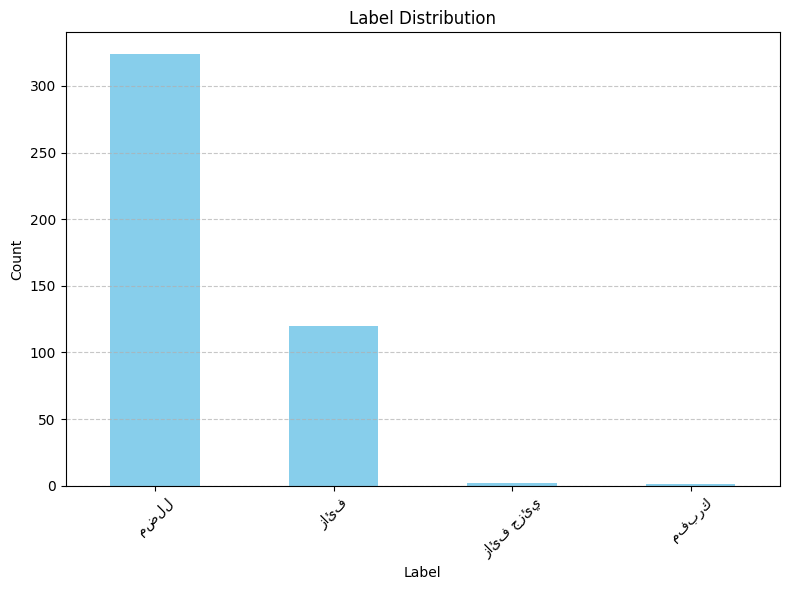

In [78]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df_merged['Label'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [79]:
label_counts_counts = df_merged.groupby('Label').size()
print(label_counts_counts)

Label
زائف         120
زائف جزئي      2
مضلل         324
مفبرك          1
dtype: int64


# Save the  dataframe

In [80]:
# Save the merged dataframe to a CSV file
df_merged.to_csv('fatabyyano_news.csv', index=False)

print("Data has been saved tofatabyyano_news.csv")

Data has been saved tofatabyyano_news.csv
